Data preprocessing and cleaning is an important step before any text mining task. I will remove the punctuations, stopwords and normalize the reviews as much as possible. After every preprocessing step, it is a good practice to check the most frequent words in the data. Therefore, let’s define a function that would plot a bar graph of n most frequent words in the data.

# libraries

In [1]:
#ibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
import re
import spacy


In [2]:
!python -m spacy download en # one time run


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Defaulting to user installation because normal site-packages is not writeable


In [3]:


# Load the DataFrame
df = pd.read_csv("D:/FALL 2023/PROJECTS-INFO/Project-topic modelling/Reviews.csv")
df.info



<bound method DataFrame.info of           Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
19993  19994  B002C50X1M  A220PJBDV3DJG9                Patricia A. Brown   
19994  19995  B002C50X1M  A1AZ1NXGGP6LDX  Christine Parker "Love to Read"   
19995  19996  B002C50X1M  A1XRXZI5KOMVDD            KAF1958 "amandaf0626"   
19996  19997  B002C50X1M   A7G9M0IE7LABX                            Kevin   
19997  19998  B002C50X1M  A38J5PRUDESMZF                              ray   

       HelpfulnessNumerator  HelpfulnessDen

# Data PreProcessing

Converting Unix timestamps (e.g., "1303862400") to a human-readable date and time format.

In [4]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.head

<bound method NDFrame.head of           Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
19993  19994  B002C50X1M  A220PJBDV3DJG9                Patricia A. Brown   
19994  19995  B002C50X1M  A1AZ1NXGGP6LDX  Christine Parker "Love to Read"   
19995  19996  B002C50X1M  A1XRXZI5KOMVDD            KAF1958 "amandaf0626"   
19996  19997  B002C50X1M   A7G9M0IE7LABX                            Kevin   
19997  19998  B002C50X1M  A38J5PRUDESMZF                              ray   

       HelpfulnessNumerator  HelpfulnessDenom

# Data Cleaning

In [5]:
#  function for text preprocessing
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^a-zA-Z]", " ", text).lower()
    # Remove stopwords and short words (length < 3)
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    return text

# Initializing stopwords
stop_words = set(stopwords.words('english'))

# Applying text preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

print(df.head(5))

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
0                     1                       1      5 2011-04-27   
1                     0                       0      1 2012-09-07   
2                     1                       1      4 2008-08-18   
3                     3                       3      2 2011-06-13   
4                     0                       0      5 2012-10-21   

                 Summary                                               Text  
0  Good Quality Dog Food  bought several vitality canned dog food produc...  
1      N

# Frequency of Terms

In [6]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


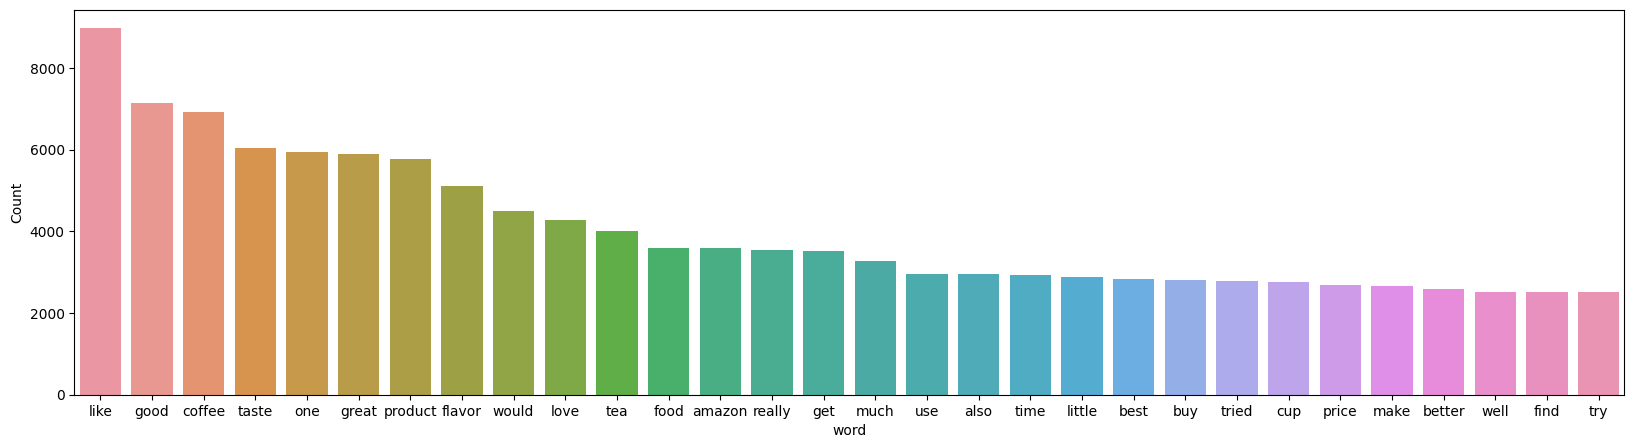

In [7]:
freq_words(df["Text"])

# Tokenizing

In [8]:
#tokenizing the reviews and then lemmatizing the tokenized reviews
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for text in texts:
        doc = nlp(text)
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

# Tokenize the reviews
tokenized_reviews = [review.split() for review in df["Text"]]

# Apply lemmatization
reviews_2 = lemmatization(df["Text"], tags=['NOUN', 'ADJ'])


['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo']
['product', 'jumbo', 'peanut', 'peanut', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'product', 'jumbo']


C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


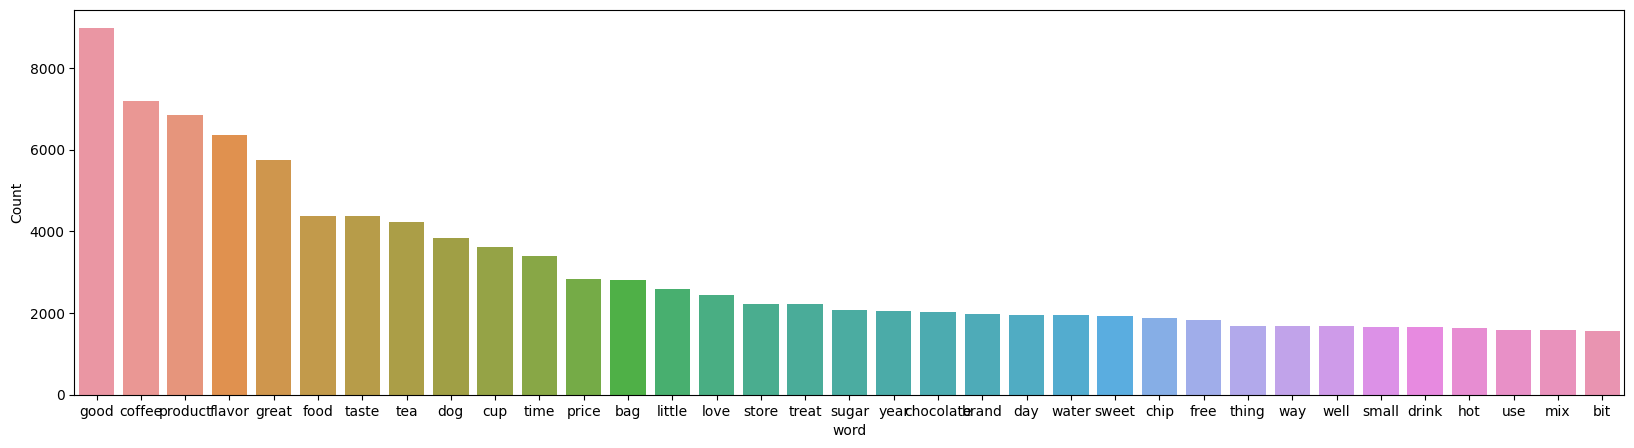

In [9]:
print(tokenized_reviews[1])
print(reviews_2[1])

#de-tokenizing the lemmatized reviews and ploting the most common words
reviews_3 = [' '.join(review) for review in reviews_2]
df["Text"]=reviews_3
freq_words(df['Text'], 35)